# Ritz Example 1

Solve the differential equation

$$
\frac{d^2 u}{dx^2} +u + x = 0
$$

for $0 \le x \le 1$ with $u(0) = u(1) = 0$ 

First we note that the differential equation is equivalent to
$$
I[u] = \int_0^1 \left[-\frac{1}{2} \left( \frac{du}{dx} \right)^2 + \frac{1}{2}u^2 + ux \right]dx
$$

and we consider the trial function $u_1 = a_1x(1-x)$

In [94]:
import sympy as sm
sm.init_printing()

a1,x,u,u1 = sm.symbols('a_1 x u u_1')

#trial function
u1 = a1*x*(1-x)
I = sm.integrate(-(sm.diff(u1,x))**2/2 + u1**2/2 + u1*x,(x,0,1))

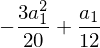

In [95]:
I

Now we set $\delta I[a_1] = 0$ to find $a_1$

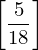

In [96]:
sm.solve(sm.diff(I,a1),a1)

Which gives the approximate solution

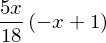

In [97]:
u = u1.subs(a1,sm.solve(sm.diff(I,a1),a1)[0])
u

However if we substitute this into the initial governing equation, we find

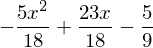

In [98]:
ans = sm.diff(u,x,x) + u +x
ans.simplify()

Which we can show is not zero for the given domain

In [99]:
ans.subs(x,0.5)

We can choose a different trial function
$$
u_2 = a_1 \sin x + a_2 x
$$
with
$$
a_1 \sin 1 + a_2 =0
$$
to satisfy the boundary condition, which gives

$$
u_2 = a_1(\sin x - x\sin 1)
$$

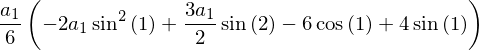

In [119]:
a2, u2 = sm.symbols('a_1 u_2')
u2 = a2*(sm.sin(x)-x*sm.sin(1))
I = sm.integrate(-(sm.diff(u2,x))**2/2 + u2**2/2 + u2*x,(x,0,1))
I.simplify()

solving $\delta I = 0$ for $a_1$ gives

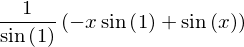

In [120]:
u2 = u2.subs(a2,sm.solve(sm.diff(I,a2),a2)[0].simplify())
u2

It turns out this is the exact solution. We can compare this to a solution where we simply add one more term to the polynomial

$$
u_3 = a_1 x (1-x) + a_2 x^2 (1-x^2)
$$

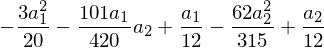

In [121]:
a3,a4,u3 = sm.symbols('a_1 a_2 u_3')
u3 = a3*x*(1-x) + a4*x**2*(1-x**2)
I = sm.integrate(-(sm.diff(u3,x))**2/2 + u3**2/2 + u3*x,(x,0,1))
I.simplify()

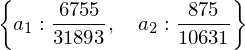

In [122]:
sm.solve((sm.diff(I,a3),sm.diff(I,a4)),(a3,a4))

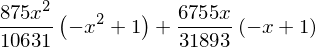

In [123]:
# use '_' to get previous results
u3=u3.subs(_)
u3

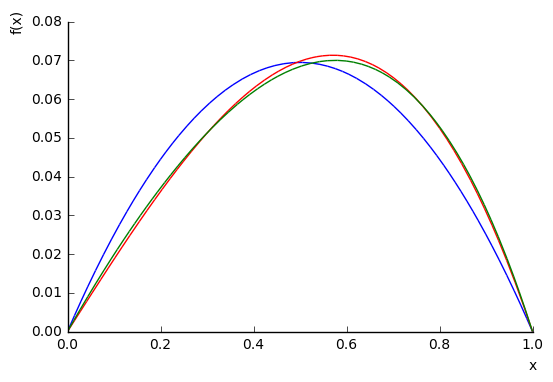

In [139]:
p=sm.plotting.plot(u,u2,u3,(x,0,1),show=False)
p[0].line_color='blue'
p[1].line_color='red'
p[2].line_color='green'
p.show()

In the above solution, the red curve is exact, blue is single-term approximation, and green is the two-term approximation.

# Ritz Example 2

For a 2D domaine defined by $x\in [0,\pi]$ and $y\in [0,1]$ solve the following PDE
$$
\frac{\partial^2 u}{\partial x^2} + \frac{\partial^2 u}{\partial y^2} = 0
$$
where $u(0,y) = u(\pi,y) = u(0,x) = 0$ and $u(x,1) = \sin x$

From a previous example, we know that this differential equation corresponds to
$$
I[u] = \frac{1}{2} \int_0^1 \int_0^\pi \left [\left( \frac{\partial u}{\partial x}\right)^2 + \left( \frac{\partial u}{\partial y}\right)^2\right ] dx dy
$$

We assume trial functions to have the form $u(x,y) = f(y) \sin x$ to satisfy the boundary conditions in $x$.
Substituting into the integral and integrating over $x$ gives.

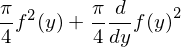

In [154]:
x,y = sm.symbols('x y')
f = sm.Function('f')(y)
u = f*sm.sin(x)
I = sm.integrate(sm.diff(u,x)**2+sm.diff(u,y)**2,(x,0,sm.pi))/2
I

We can now solve the Euler-Lagrange equation $f - f^{\prime \prime} = 0$ subject to the boundary conditions.

In [160]:
f_ans = sm.dsolve(f-sm.diff(f,y,y))
f_ans

In [163]:
C1, C2 = sm.symbols('C1 C2')
sm.solve([f_ans.subs(y,0),f_ans.subs(y,1)-1],[C1,C2])

While this solver can't find the solution, it is not hard by hand to obtain that
$$
f(y) = \frac{\sinh y}{\sinh 1}
$$
which gives the total solution
$$
u(x,y) = \frac{\sinh y}{\sinh 1} \sin x
$$

We can verify that this is the exact solution